In [ ]:
# import some of library that we need to look the confusion matrix, recall, f1_score, and accuracy score to look how much your model is well
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
# import some of library to evaluate model
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [ ]:
# import library to build our model
import os
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Model

import tensorflow as tf
from tensorflow.keras.applications.vgg19 import preprocess_input


# plotting
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from keras.models import load_model
model1 = load_model('/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/0. ensemble/3. Modelling VGG19/model_drop_batch_weight_from_callback_VGG19.h5')
model2 = load_model('/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/0. ensemble/6. Modelling VGG19 v3/model_drop_batch_weight_from_callback_VGG20.h5')
# model3 = load_model('/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/4. Modelling Inception Resnet V2/model_drop_batch_weight_from_callback_VGG19.h5')




In [ ]:
models = [model1, model2]

In [ ]:
batch_size = 32
height = 150 
width = 150


In [ ]:
TESTING_DIR = '/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/Dataset/Splitted 2/test'
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size=batch_size,                                                             
                                                  target_size=(height, width),
                                                  class_mode= None,
                                                  shuffle=False
                                                  )

Found 24 images belonging to 5 classes.


In [ ]:
pred = []

for model in models:
  pred.append(model.predict(test_generator, batch_size=32))

pred = np.average(pred, axis=0)
class_names_test = test_generator.class_indices
print(classification_report(test_generator.classes, pred.argmax(axis=1),
                            target_names=class_names_test))

                     precision    recall  f1-score   support

        No_findings       1.00      1.00      1.00         5
              covid       1.00      1.00      1.00         4
             normal       0.83      1.00      0.91         5
pneumonia_bacterial       0.80      0.80      0.80         5
    pneumonia_viral       0.75      0.60      0.67         5

           accuracy                           0.88        24
          macro avg       0.88      0.88      0.88        24
       weighted avg       0.87      0.88      0.87        24



accuracy : 0.8333333333333334
Precision :  0.8263888888888888
F1-Score :  0.8200757575757575


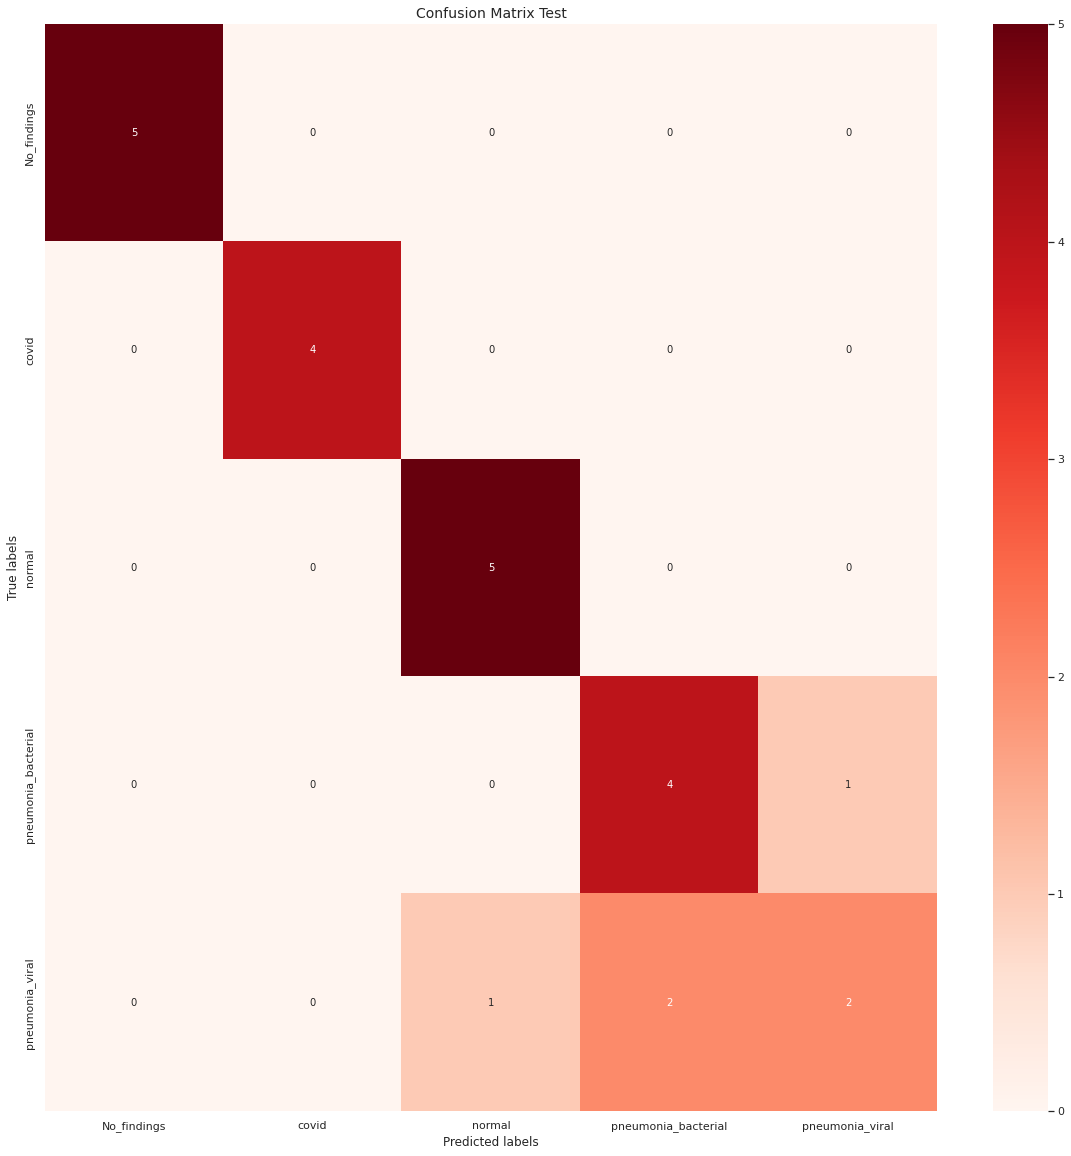

In [ ]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    print("accuracy :", accuracy)
    precision=precision_score(y_true, y_pred,average='weighted')
    print("Precision : ", precision)
    f1Score=f1_score(y_true, y_pred, average='weighted')
    print("F1-Score : ", f1Score) 
    cm=confusion_matrix(y_true, y_pred)
    return accuracy, precision, f1Score

height=150; width=150
batch_size=32


true_classes = test_generator.classes
yPredictions = pred.argmax(axis=1)
class_names_test = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(20,20))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(5,5)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names_test)   
ax.yaxis.set_ticklabels(class_names_test)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()